(1) 데이터 읽어와서 확인하기

In [5]:
import pandas as pd

df = pd.read_csv('train(1).csv')

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
df.sort_values('Fare', ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0000,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0000,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0000,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C


In [14]:
pd.DataFrame(df['Survived'].value_counts())
#데이타프레임형식으로 출력

,Survived
0,549
1,342


In [15]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

(2) 데이터 전처리

In [16]:
#결측치 확인
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
# 객실번호(Cabin) 컬럼 삭제  - 결측 데이터가 너무 많아서.

df.drop(['Cabin'], axis=1, inplace=True)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [25]:
# 탑승항구  이름이 Embarked...복잡.  Gate로 변경한다.  영어가길어서.
df = df.rename(columns={'Embarked':'Gate'})
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Gate
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [28]:
#탑승 항구는 결측치가 2개이므로... 최빈값으로 채우기

# 최빈값 찾기  ... S 
df['Gate'].value_counts()

S    646
C    168
Q     77
Name: Gate, dtype: int64

In [26]:
# 찾은 최빈값으로 대체하기
df['Gate']=df['Gate'].fillna('S')
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Gate             0
dtype: int64

In [29]:
# '나이'는 결측치가 많고  생존 여부와 상관이 있을 것으로 판단되어  평균값으로 대체


avg=df['Age'].mean()
df['Age'] = df['Age'].fillna(avg)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Gate           0
dtype: int64

(3) 데이터 그룹핑하기

In [30]:
# 항구(Gate) 별 객실 등급(Pclass) 컬럼의 평균값 

df['Pclass'].groupby(df["Gate"]).mean()


Gate
C    1.886905
Q    2.909091
S    2.346749
Name: Pclass, dtype: float64

In [31]:
# Pclass, Sex  컬럼을 기준으로 평균 구하기

df.groupby(["Pclass", "Sex"]).mean()

PassengerId  Survived        Age     SibSp     Parch  \
Pclass Sex                                                            
1      female   469.212766  0.968085  34.141405  0.553191  0.457447   
       male     455.729508  0.368852  39.287717  0.311475  0.278689   
2      female   443.105263  0.921053  28.748661  0.486842  0.605263   
       male     447.962963  0.157407  30.653908  0.342593  0.222222   
3      female   399.729167  0.500000  24.068493  0.895833  0.798611   
       male     455.515850  0.135447  27.372153  0.498559  0.224784   

                     Fare  
Pclass Sex                 
1      female  106.125798  
       male     67.226127  
2      female   21.970121  
       male     19.741782  
3      female   16.118810  
       male     12.661633

질문 :
1등급객실의 생존자는 몇명?
전체 생존자는 몇명?
1등급 탑승객은 총 몇명?
남성은 몇명?
남성이면서 생존자는 몇명?


In [56]:
#1등급 탑승객은 총 몇명? 총 216명
aa=df["Pclass"]==1
aa.value_counts()
aa


#1등급객실의 생존자는 몇명? 총 136명
a = df[df['Pclass']==1]['Survived'].value_counts()
a

1    136
0     80
Name: Survived, dtype: int64

In [69]:
#전체 생존자는 몇명? 총 342명
b=df['Survived'].value_counts()
b

0    549
1    342
Name: Survived, dtype: int64

In [76]:
#남성 몇명? 577명
m= df['Sex']=="male"
m.value_counts()
#여성 몇명? 314명
f= df['Sex']=="female"
f.value_counts()

mm= df[df['Sex']=="male"]
ff= df[df['Sex']=="female"]

#남성중 생존자? 109명
ms = mm['Survived']==1
ms.value_counts()

#여성중 생존자? 233명
fs = ff['Survived']==1
fs.value_counts()


True     233
False     81
Name: Survived, dtype: int64

In [89]:
pip install pyplot

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pyplot (from versions: none)
ERROR: No matching distribution found for pyplot


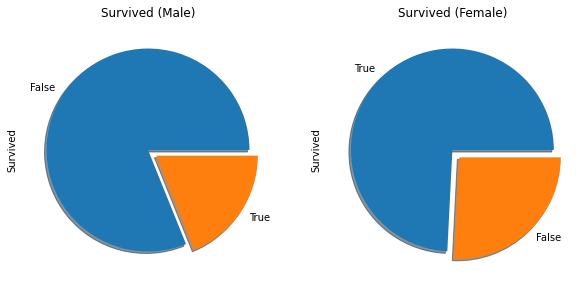

In [92]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,2,figsize=(10,5)) #한줄에 2칸짜리 그래프를 그릴거양
alive_male = ms.value_counts()
alive_male.plot.pie(explode=[0, 0.1], ax =ax[0], shadow=True) 
#ax[0]이라는것은 그림이 첫번째로 나온다는것, explode는 파이조각이 살짝 떨어져있게끔 만들어줌

alive_female = fs.value_counts()
alive_female.plot.pie(explode=[0, 0.1], ax =ax[1], shadow=True)

ax[0].set_title('Survived (Male)')
ax[1].set_title('Survived (Female)')

plt.show()
 
